Prpairing Mexico Data

In [1]:
import pandas as pd

In [2]:
# Loading CSV files into DataFrames
import pandas as pd

df1 = pd.read_csv('/content/mexico-real-estate-1.csv', encoding='latin1')
df2 = pd.read_csv('/content/mexico-real-estate-2.csv', encoding='latin1')
df3 = pd.read_csv('/content/mexico-real-estate-3.csv', encoding='latin1')

# Print object type and shape for DataFrames
print("df1 type:", type(df1))
print("df1 shape:", df1.shape)
print()
print("df2 type:", type(df2))
print("df2 shape:", df2.shape)
print()
print("df3 type:", type(df3))
print("df3 shape:", df3.shape)

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (700, 7)

df2 type: <class 'pandas.core.frame.DataFrame'>
df2 shape: (700, 7)

df3 type: <class 'pandas.core.frame.DataFrame'>
df3 shape: (700, 6)


Cleaning df1 Data

In [3]:
# Printing df1 shape
df1.shape

# Printing df1 info
df1.info()

# Geting output of df1 head
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        700 non-null    int64  
 6   price_usd      700 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 38.4+ KB


,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,2,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [4]:
df1=df1.drop(['Unnamed: 0'], axis=1)

In [5]:
# Drop null values from df1
df1.dropna(inplace =True)
# Clean "price_usd" column in df10
df1["price_usd"]= df1["price_usd"].str.replace("$", "",regex=False).str.replace(",","").astype(float)

# Print object type, shape, and head
print("df1 type:", type(df1))
print("df1 shape:", df1.shape)
df1.head()

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (583, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37


Cleaning df2 Data

In [6]:
# Drop null values from df2
df2.dropna(inplace =True)

# Create "price_usd" column for df2 (19 pesos to the dollar in 2014)
df2["price_usd"] = df2["price_mxn"]/19

# Drop "price_mxn" column from df2
df2.drop(columns=["price_mxn"], inplace =True)
# Print object type, shape, and head
print("df2 type:", type(df2))
print("df2 shape:", df2.shape)
df2.head()

df2 type: <class 'pandas.core.frame.DataFrame'>
df2 shape: (571, 7)


,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,apartment,Nuevo León,25.721081,-100.345581,72,68421.052632
2,3,house,Morelos,23.634501,-102.552788,360,278947.368421
6,7,apartment,Estado de México,19.272040,-99.572013,85,65789.473684
7,8,house,San Luis Potosí,22.138882,-100.996510,158,111578.947368
8,9,apartment,Distrito Federal,19.394558,-99.129707,65,39904.736842


In [7]:
df2=df2.drop(['Unnamed: 0'], axis=1)
df2.head()

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72,68421.052632
2,house,Morelos,23.634501,-102.552788,360,278947.368421
6,apartment,Estado de México,19.272040,-99.572013,85,65789.473684
7,house,San Luis Potosí,22.138882,-100.996510,158,111578.947368
8,apartment,Distrito Federal,19.394558,-99.129707,65,39904.736842


Cleaning df3

In [8]:
# Drop null values from df3
df3.dropna(inplace =True)

# Create "lat" and "lon" columns for df3
df3[["lat", "lon"]] = df3["lat-lon"].str.split(",", expand =True)

# Print object type, shape, and head
print("df3 type:", type(df3))
print("df3 shape:", df3.shape)
df3.head()

df3 type: <class 'pandas.core.frame.DataFrame'>
df3 shape: (582, 8)


,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.52589,-99.151703
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.2640539,-99.5727534
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956
5,6,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728


In [9]:
df3=df3.drop(['Unnamed: 0'], axis=1)
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728


In [10]:
# Creating "state" column for df3
df3["state"] = df3["place_with_parent_names"].str.split("|", expand= True)[2]

# Droping "place_with_parent_names" and "lat-lon" from df3
df3.drop(columns=["place_with_parent_names", "lat-lon"], inplace=True )

# Print object type, shape, and head
print("df3 type:", type(df3))
print("df3 shape:", df3.shape)
df3.head()

df3 type: <class 'pandas.core.frame.DataFrame'>
df3 shape: (582, 6)


,property_type,area_m2,price_usd,lat,lon,state
0,apartment,71,48550.59,19.52589,-99.151703,Distrito Federal
1,house,233,168636.73,19.2640539,-99.5727534,Estado de México
2,house,300,86932.69,19.268629,-99.671722,Estado de México
4,apartment,84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,175,102763.00,20.689157,-103.366728,Jalisco


Caoncatinating all 3 DataFrames

In [11]:

df = pd.concat([df1,df2,df3])

# Printing object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37


Saving the Cleaned and Combined data frame df

In [14]:

df.to_csv("/content/mexico-real-estate-clean.csv", index=False)

Now We will the EDA

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Importing the df
df = pd.read_csv("/content/mexico-real-estate-clean.csv")

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


In [17]:
# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)

# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state.head()

mean_price_by_state type: <class 'pandas.core.series.Series'>
mean_price_by_state shape: (30,)


,price_usd
state,
Querétaro,133955.913417
Guanajuato,133277.965833
Nuevo León,129221.985834
Distrito Federal,128347.267365
Quintana Roo,128065.415734


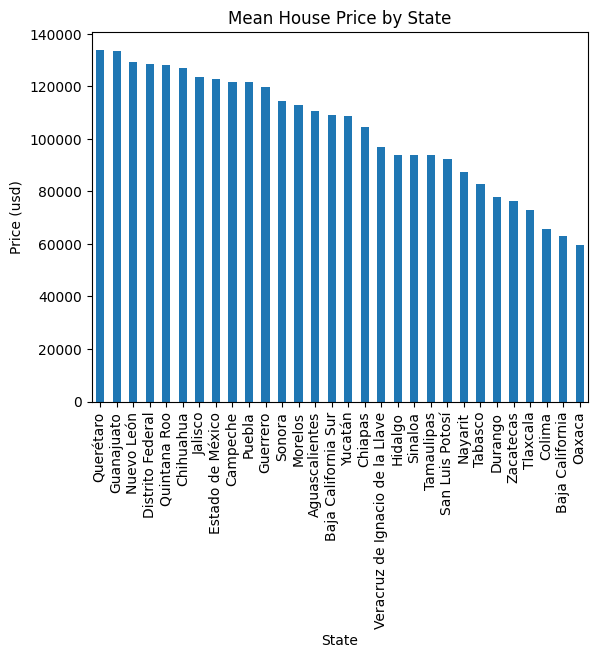

In [19]:
# Creating bar chart from `mean_price_by_state` using pandas
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Price (usd)",
    title="Mean House Price by State"
);

It seems odd that Querétaro would be the most expensive real estate market in Mexico  according to recent GDP numbers, it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m2. In order to do that, we need to create a new column.

Create a new column in df called "price_per_m2". This should be the price for each house divided by it's size.

In [20]:
# Creating "price_per_m2" column
df["price_per_m2"] = df["price_usd"]/df["area_m2"]

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


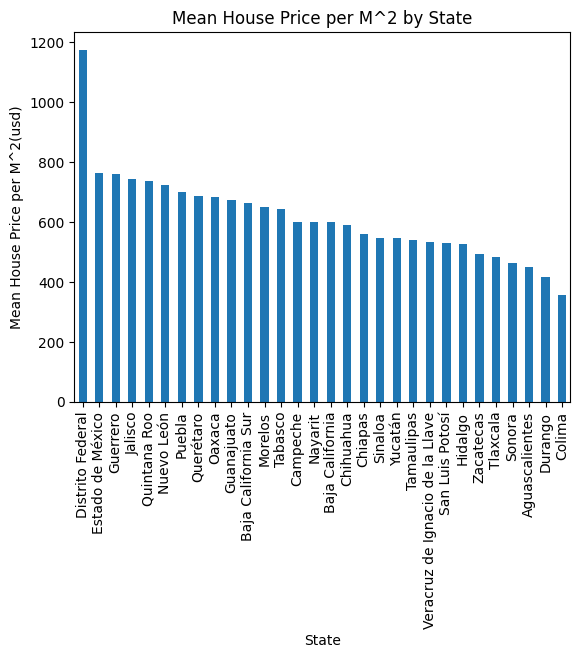

In [21]:
# Group `df` by "state", create bar chart of "price_per_m2"
(
    df
    .groupby("state")
    ["price_per_m2"].mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Mean House Price per M^2(usd)",
        title="Mean House Price per M^2 by State"
    )
);

Now we see that the capital Mexico City (Distrito Federal) is by far the most expensive market. Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate markets.

 relationship between home size and price

A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.

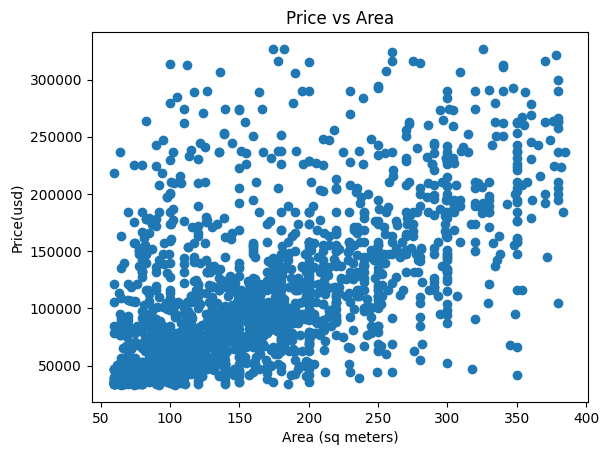

In [22]:
# Create scatter plot of "price_usd" vs "area_m2"
plt.scatter(x=df["area_m2"], y=df["price_usd"])
plt.xlabel("Area (sq meters)")
plt.ylabel("Price(usd)")
plt.title("Price vs Area");


While there's a good amount of variation, there's definitely a positive correlation — in other words, the bigger the house, the higher the price.

Using the corr method, calculate the Pearson correlation coefficient for "area_m2" and "price_usd".

In [23]:
# Calculating correlation of "price_usd" and "area_m2"
p_correlation = df["area_m2"].corr(df["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.5855182454266904


The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.

Create a new DataFrame named df_morelos. It should include all the houses from df that are in the state of Morelos.

In [24]:

df_morelos = df[df["state"] =="Morelos"]

# Print object type, shape, and head
print("df_morelos type:", type(df_morelos))
print("df_morelos shape:", df_morelos.shape)
df_morelos.head()

df_morelos type: <class 'pandas.core.frame.DataFrame'>
df_morelos shape: (160, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623


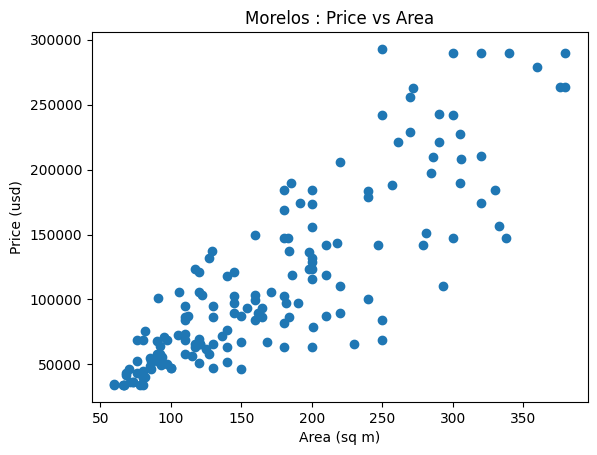

In [25]:
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])
plt.xlabel("Area (sq m)")
plt.ylabel("Price (usd)")
plt.title("Morelos : Price vs Area");

It looks like the correlation is even stronger within Morelos. Let's calculate the correlation coefficient and verify that that's the case.

In [26]:
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])
# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.8498077614061482


With a correlation coefficient that high, we can say that there's a strong relationship between house size and price in Morelos.

To conclude, let's look at the capital Mexico City (Distrito Federal).

creating a new DataFrame called df_mexico_city that includes all the observations from df that are part of the Distrito Federal. Next, create a scatter plot that shows price vs area.

df_mexico_city type: <class 'pandas.core.frame.DataFrame'>
df_mexico_city shape: (303, 7)
Correlation of 'area_m2' and 'price_usd' (Mexico City): 0.41070392058534355


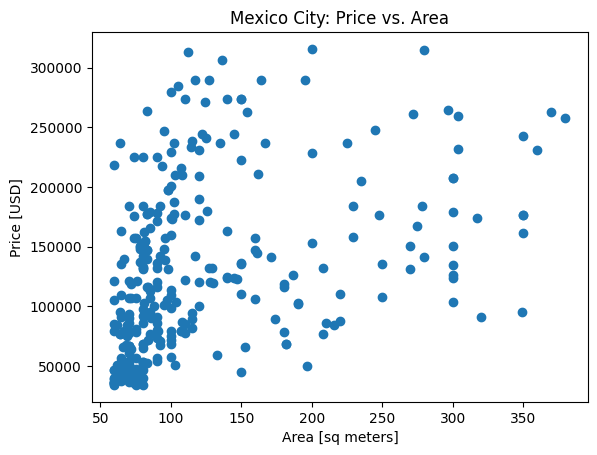

In [27]:
df_mexico_city = df[df["state"] == "Distrito Federal"]

# Print object type and shape
print("df_mexico_city type:", type(df_mexico_city))
print("df_mexico_city shape:", df_mexico_city.shape)

# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"])  # REMOVERHS

# Add x-axis label
plt.xlabel("Area [sq meters]")  # REMOVERHS

# Add y-axis label
plt.ylabel("Price [USD]")  # REMOVERHS

# Add title
plt.title("Mexico City: Price vs. Area")  # REMOVERHS

# Calculate correlation of "price_usd" and "area_m2" in `df_mexico_city`
p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation)

Looking at the scatter plot and correlation coefficient, there's see a weak relationship between size and price.

One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price. In fact, in the next project, we're going to look at another important Latin American city — Buenos Aires, Argentina — and build a model that predicts housing price by taking much more than size into account.
